In [34]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import dataholders as dh
import utils

c:\users\jakub\appdata\local\programs\python\python35\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [35]:
fall = (900, 1100)
flat1 = (3850, 4900)
rise = (5500, 6000)
flat2 = (6000, 6666)
flat3 = (6730, 7400)

custom1 = (5700, 5760)
custom2 = (5800, 5940)

In [64]:
path = 'data_flight16.mat'
window = 101
data = dh.TempWindData(path, path, True)

data.cut_time(*fall)

data.get_angles(True)
data.get_temp_from_voltage(101)
data.get_temp_deviations(window)
data.get_angle_deviations(window)

In [23]:
print(data.popt1)
print(data.popt2)

[ 32.09631867 -76.75332571]
[ 35.84567371 -79.75448731]


In [24]:
print(np.sqrt(((data.T1 - data.T_base)**2).mean()))

print(np.sqrt(((data.T2 - data.T_base)**2).mean()))

0.0982262852645
0.0923300950536


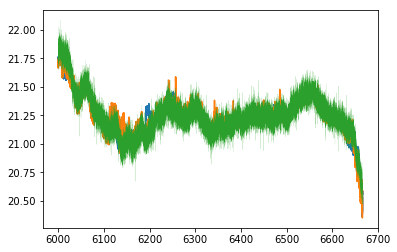

In [44]:
%matplotlib inline
plt.plot(data.time, data.T1)
plt.plot(data.time, data.T2)
plt.plot(data.time, data.T_base, lw=.1)
plt.show()

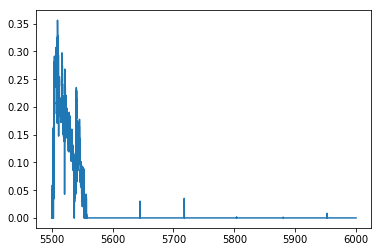

In [39]:
plt.plot(data.time, data.lwc)
plt.show()

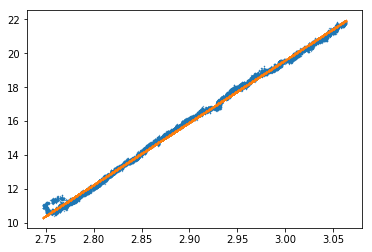

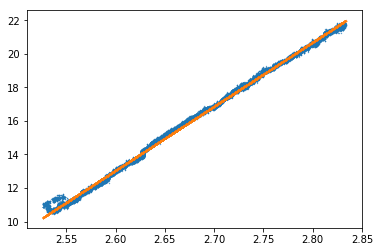

In [40]:
plt.scatter(data.V1, data.T_base, s=.1)
plt.scatter(data.V1, data.T1, s=.1)
plt.show()

plt.scatter(data.V2, data.T_base, s=.1)
plt.scatter(data.V2, data.T2, s=.1)
plt.show()

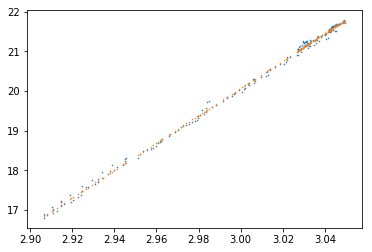

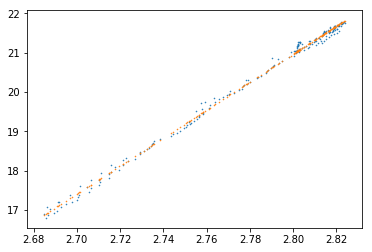

In [33]:
plt.scatter(utils.rolling_window(data.V1, 100).mean(1)[::100], utils.rolling_window(data.T_base, 100).mean(1)[::100], s=.3)
plt.scatter(utils.rolling_window(data.V1, 100).mean(1)[::100], utils.rolling_window(data.T1, 100).mean(1)[::100], s=.3)
plt.show()

plt.scatter(utils.rolling_window(data.V2, 100).mean(1)[::100], utils.rolling_window(data.T_base, 100).mean(1)[::100], s=.3)
plt.scatter(utils.rolling_window(data.V2, 100).mean(1)[::100], utils.rolling_window(data.T2, 100).mean(1)[::100], s=.3)
plt.show()

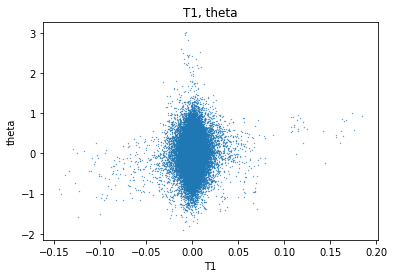

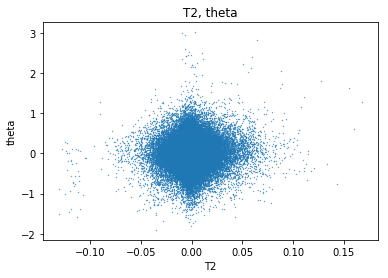

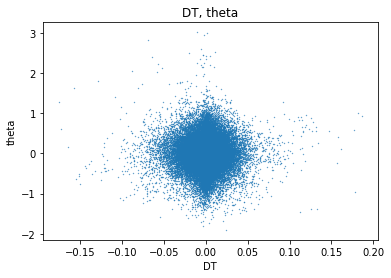

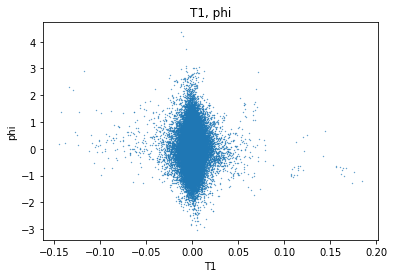

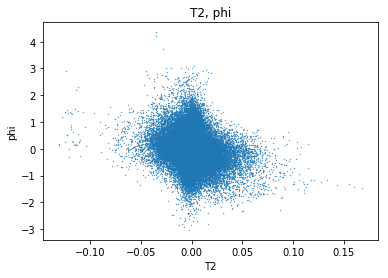

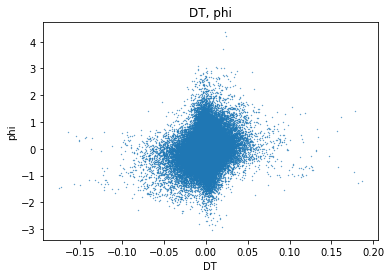

In [45]:
plt.title('T1, theta')
plt.xlabel('T1')
plt.ylabel('theta')

plt.scatter(data.T1_dev, data.theta_dev, s=.1)

plt.show()

plt.title('T2, theta')
plt.xlabel('T2')
plt.ylabel('theta')
plt.scatter(data.T2_dev, data.theta_dev, s=.1)

plt.show()

plt.title('DT, theta')
plt.xlabel('DT')
plt.ylabel('theta')
plt.scatter(data.DT_dev, data.theta_dev, s=.1)

plt.show()

plt.title('T1, phi')
plt.xlabel('T1')
plt.ylabel('phi')
plt.scatter(data.T1_dev, data.phi_dev, s=.1)

plt.show()

plt.title('T2, phi')
plt.xlabel('T2')
plt.ylabel('phi')
plt.scatter(data.T2_dev, data.phi_dev, s=.1)

plt.show()

plt.title('DT, phi')
plt.xlabel('DT')
plt.ylabel('phi')
plt.scatter(data.DT_dev, data.phi_dev, s=.1)

plt.show()

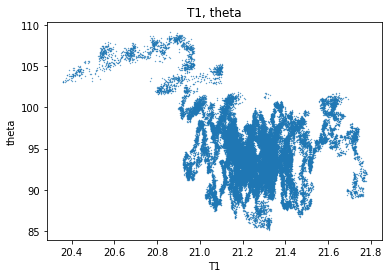

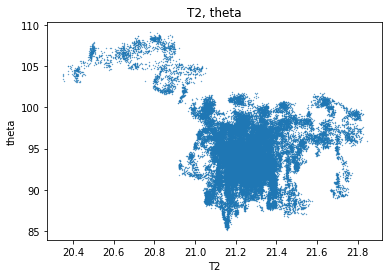

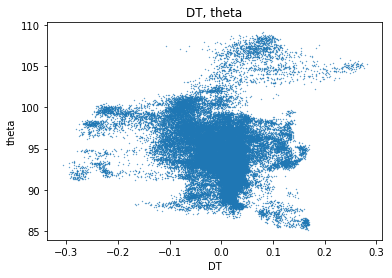

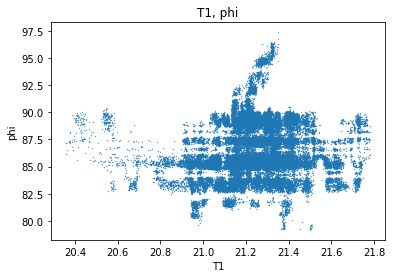

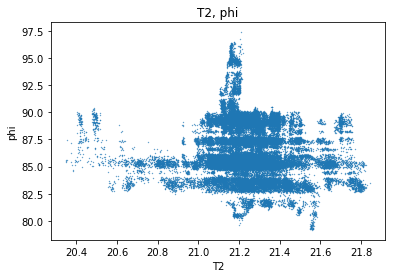

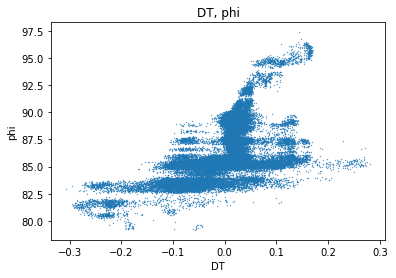

In [47]:
plt.title('T1, theta')
plt.xlabel('T1')
plt.ylabel('theta')

plt.scatter(data.T1, data.theta, s=.1)

plt.show()

plt.title('T2, theta')
plt.xlabel('T2')
plt.ylabel('theta')
plt.scatter(data.T2, data.theta, s=.1)

plt.show()

plt.title('DT, theta')
plt.xlabel('DT')
plt.ylabel('theta')
plt.scatter(data.DT, data.theta, s=.1)

plt.show()

plt.title('T1, phi')
plt.xlabel('T1')
plt.ylabel('phi')
plt.scatter(data.T1, data.phi, s=.1)

plt.show()

plt.title('T2, phi')
plt.xlabel('T2')
plt.ylabel('phi')
plt.scatter(data.T2, data.phi, s=.1)

plt.show()

plt.title('DT, phi')
plt.xlabel('DT')
plt.ylabel('phi')
plt.scatter(data.DT, data.phi, s=.1)

plt.show()

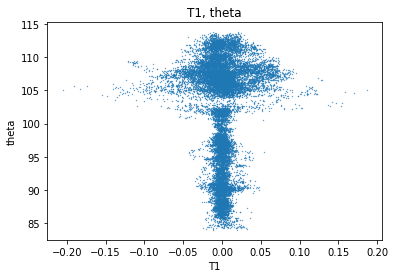

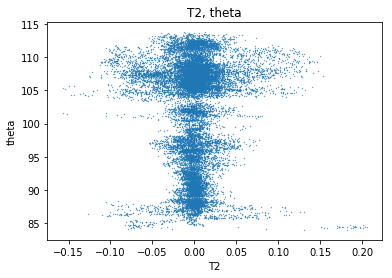

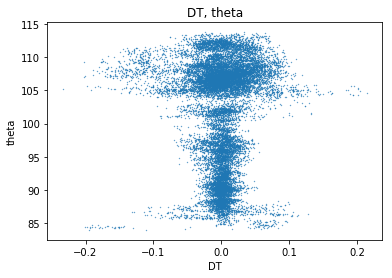

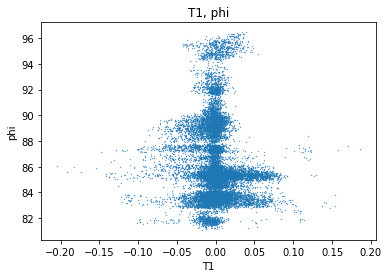

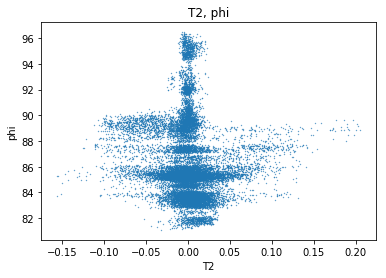

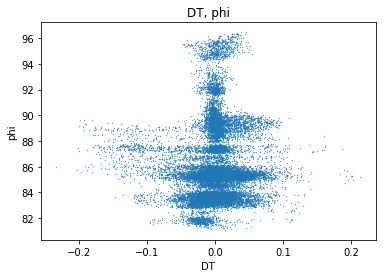

In [65]:
plt.title('T1, theta')
plt.xlabel('T1')
plt.ylabel('theta')

plt.scatter(data.T1_dev, data.theta[50:-50], s=.1)

plt.show()

plt.title('T2, theta')
plt.xlabel('T2')
plt.ylabel('theta')
plt.scatter(data.T2_dev, data.theta[50:-50], s=.1)

plt.show()

plt.title('DT, theta')
plt.xlabel('DT')
plt.ylabel('theta')
plt.scatter(data.DT_dev, data.theta[50:-50], s=.1)

plt.show()

plt.title('T1, phi')
plt.xlabel('T1')
plt.ylabel('phi')
plt.scatter(data.T1_dev, data.phi[50:-50], s=.1)

plt.show()

plt.title('T2, phi')
plt.xlabel('T2')
plt.ylabel('phi')
plt.scatter(data.T2_dev, data.phi[50:-50], s=.1)

plt.show()

plt.title('DT, phi')
plt.xlabel('DT')
plt.ylabel('phi')
plt.scatter(data.DT_dev, data.phi[50:-50], s=.1)

plt.show()

In [56]:
data.DT_dev.shape

(66500,)

In [58]:
data.phi[50:-50].shape

(66500,)

Dla każdego $V_i$ z osobna, dla każdej referencji z osobna: 

Z każdego odcinka, fragment-reprezentant, z fragmentu jeden punkt (średnia) $(V, T)$, dopasowania między parami punktów, zobaczyć jak zmienia się czułość z czasem (współczynnik dopasowania)